<a href="https://colab.research.google.com/github/Racheus/DIP_Final_2023/blob/main/Model9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=False)


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

In [ ]:
train_folder_path = "/content/drive/MyDrive/DIPFinalWork/rps"
def apply_skin_dectection(image):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # 设定肤色的HSV阈值范围
  lower_skin = np.array([0, 12, 20], dtype=np.uint8)
  upper_skin = np.array([25, 255, 255], dtype=np.uint8)

  # 根据阈值创建肤色掩码
  skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)

  # 进行形态学操作（开运算）
  kernel = np.ones((2, 2), np.uint8)
  skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)
  contours, _ = cv2.findContours(skin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(image, contours, -1, (0 , 255 , 0), 3)
  return image
def apply_canny_edge_detection(image):
    edges = cv2.Canny(image, 120, 200)
    return edges

paper_train_images = []
rock_train_images = []
scissors_train_images = []


batch_size = 100  # 调整批处理大小
for class_name in ['paper', 'scissors', 'rock']:
    class_folder_path = os.path.join(train_folder_path, class_name)
    for filename in os.listdir(class_folder_path):
        file_path = os.path.join(class_folder_path, filename)

        img = cv2.imread(file_path)
        img = apply_skin_dectection(img)
        canny = apply_canny_edge_detection(img)

        if class_name == 'paper':
            paper_train_images.append(canny)
        elif class_name == 'scissors':
            scissors_train_images.append(canny)
        elif class_name == 'rock':
            rock_train_images.append(canny)

len(paper_train_images),len(scissors_train_images),len(rock_train_images)

(840, 840, 840)

In [ ]:


# Optionally, you may want to shuffle your training set if the order matters
from sklearn.utils import shuffle
paper_train_images, scissors_train_images, rock_train_images = shuffle(paper_train_images, scissors_train_images, rock_train_images, random_state=42)

# Check the lengths to verify
len(paper_train_images), len(scissors_train_images), len(rock_train_images)

(840, 840, 840)

In [ ]:
train_images = paper_train_images + scissors_train_images + rock_train_images
train_labels = [0] * len(paper_train_images) + [1] * len(scissors_train_images) + [2] * len(rock_train_images)



In [ ]:
test_folder_path = "/content/drive/MyDrive/DIPFinalWork/rps-test-set"

paper_test_images = []
rock_test_images = []
scissors_test_images = []

for class_name in ['paper', 'scissors', 'rock']:
    class_folder_path = os.path.join(test_folder_path, class_name)
    for filename in os.listdir(class_folder_path):
        file_path = os.path.join(class_folder_path, filename)

        img = cv2.imread(file_path)
        img = apply_skin_dectection(img)
        img = apply_canny_edge_detection(img)
        if class_name == 'paper':
            paper_test_images.append(img)
        elif class_name == 'scissors':
            scissors_test_images.append(img)
        elif class_name == 'rock':
            rock_test_images.append(img)

len(paper_test_images),len(scissors_test_images),len(rock_test_images)

(124, 124, 124)

In [ ]:
height,weight=paper_train_images[1].shape
print("A single picture size : ",height,"*",weight)

A single picture size :  300 * 300


In [ ]:
test_images = paper_test_images + scissors_test_images + rock_test_images
test_labels = [0] * len(paper_test_images) + [1] * len(scissors_test_images) + [2] * len(rock_test_images)


In [ ]:
train_images

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

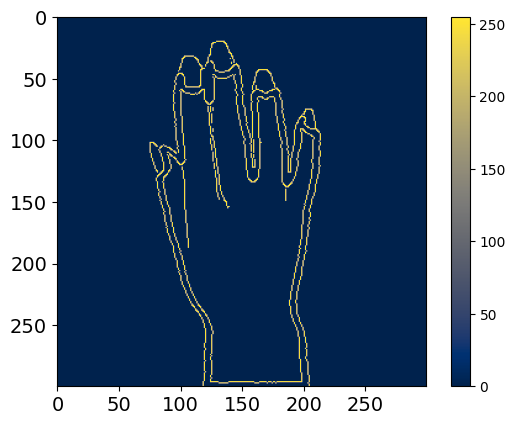

In [ ]:
plt.figure()
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.imshow(train_images[0],cmap='cividis')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_images_array = np.array(train_images).astype('float32')
train_images_array /= 255.0
train_labels_array = np.array(train_labels)

del train_images,train_labels

indices = np.arange(train_images_array.shape[0])
np.random.shuffle(indices)

train_images_array_shuffled = train_images_array[indices]
train_labels_array_shuffled = train_labels_array[indices]

# 划分训练集和测试集
test_size = 0.2  # 设置测试集占总数据的比例
random_state = 42  # 设置随机种子，确保结果可复现

# 如果标签是一维数组
X_train, X_test, y_train, y_test = train_test_split(
    train_images_array_shuffled, train_labels_array_shuffled,
    test_size=test_size, random_state=random_state)

del train_images_array_shuffled, train_labels_array_shuffled

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2016, 300, 300)
y_train shape: (2016,)
X_test shape: (504, 300, 300)
y_test shape: (504,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics
model_CNN=keras.models.Sequential([
    keras.layers.Conv2D(64,(4,4), activation='relu', input_shape=(300,300,1)),
    keras.layers.MaxPooling2D(4,4),
    keras.layers.Conv2D(128,(4,4), padding="same",activation='relu'),
    keras.layers.MaxPooling2D(4,4),
    keras.layers.Conv2D(32,(4,4), padding="same",activation='relu'),
    keras.layers.MaxPooling2D(4,4),
    keras.layers.Flatten(),
    #keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3)])



In [ ]:
model_CNN.compile(optimizer=optimizers.SGD(learning_rate=0.001),
                    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy']
                    )


In [ ]:
history1 = model_CNN.fit(X_train, y_train, epochs=80, batch_size=16,validation_data=(X_test, y_test))


Epoch 1/80
126/126 [==============================] - 12s 54ms/step - loss: 1.0803 - accuracy: 0.3616 - val_loss: 1.0633 - val_accuracy: 0.4067
Epoch 2/80
126/126 [==============================] - 6s 47ms/step - loss: 1.0568 - accuracy: 0.4033 - val_loss: 1.0387 - val_accuracy: 0.5218
Epoch 3/80
126/126 [==============================] - 6s 45ms/step - loss: 1.0311 - accuracy: 0.5699 - val_loss: 1.0110 - val_accuracy: 0.6151
Epoch 4/80
126/126 [==============================] - 6s 44ms/step - loss: 1.0011 - accuracy: 0.6567 - val_loss: 0.9776 - val_accuracy: 0.7540
Epoch 5/80
126/126 [==============================] - 6s 46ms/step - loss: 0.9649 - accuracy: 0.7485 - val_loss: 0.9367 - val_accuracy: 0.7976
Epoch 6/80
126/126 [==============================] - 6s 44ms/step - loss: 0.9194 - accuracy: 0.8170 - val_loss: 0.8846 - val_accuracy: 0.7937
Epoch 7/80
126/126 [==============================] - 5s 43ms/step - loss: 0.8607 - accuracy: 0.8428 - val_loss: 0.8192 - val_accuracy: 0.823

In [ ]:
new_learning_rate = 0.0001
model_CNN.optimizer.learning_rate = new_learning_rate

# 第二阶段训练
history2 = model_CNN.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# 将两个阶段的训练历史记录合并
history = {}
history['loss'] = history1.history['loss'] + history2.history['loss']
history['val_loss'] = history1.history['val_loss'] + history2.history['val_loss']

Epoch 1/20
126/126 [==============================] - 6s 47ms/step - loss: 0.0071 - accuracy: 0.9995 - val_loss: 0.0100 - val_accuracy: 0.9980
Epoch 2/20
126/126 [==============================] - 6s 47ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.0100 - val_accuracy: 0.9980
Epoch 3/20
126/126 [==============================] - 5s 43ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.0100 - val_accuracy: 0.9980
Epoch 4/20
126/126 [==============================] - 6s 44ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.0099 - val_accuracy: 0.9980
Epoch 5/20
126/126 [==============================] - 6s 45ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.0099 - val_accuracy: 0.9980
Epoch 6/20
126/126 [==============================] - 6s 45ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.0099 - val_accuracy: 0.9980
Epoch 7/20
126/126 [==============================] - 6s 47ms/step - loss: 0.0069 - accuracy: 0.9995 - val_loss: 0.0099 - val_accuracy: 0.9980

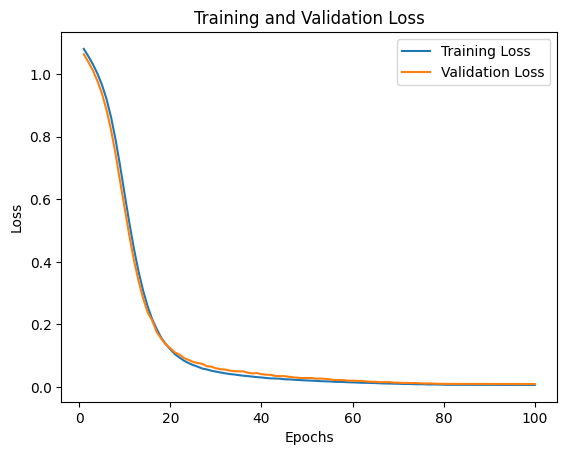

In [ ]:
train_loss = history['loss']
val_loss = history['val_loss']

# 绘制损失曲线
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
test_images_array = np.array(test_images).astype('float32')
test_images_array /= 255.0
test_labels_array = np.array(test_labels)

indices = np.arange(test_images_array.shape[0])
np.random.shuffle(indices)

test_images_array_shuffled = test_images_array[indices]
test_labels_array_shuffled = test_labels_array[indices]

In [ ]:
import pandas as pd
history_df = pd.DataFrame(history)
history_df.to_csv('training_history.csv', index=False)

In [ ]:
model_CNN.save('my_model_80+.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_acc = model_CNN.evaluate(test_images_array_shuffled,test_labels_array_shuffled, verbose=2)

print('\nTest accuracy:', test_acc)

12/12 - 2s - loss: 0.1175 - accuracy: 0.9543 - 2s/epoch - 129ms/step

Test accuracy: 0.9543010592460632


In [ ]:
probability_model = tf.keras.Sequential([model_CNN, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images_array_shuffled)

12/12 [==============================] - 1s 20ms/step


In [ ]:
predictions[100]

array([7.0391739e-05, 2.1729583e-03, 9.9775666e-01], dtype=float32)

2


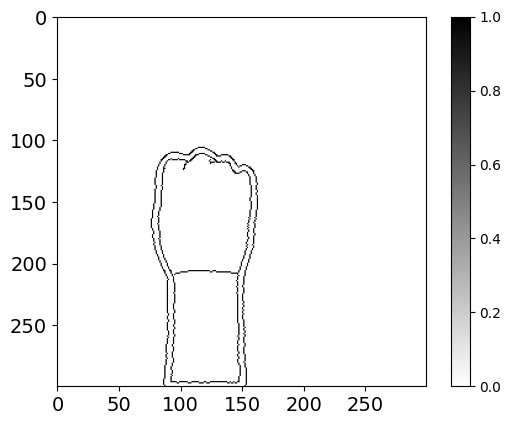

In [ ]:
print(np.argmax(predictions[100]))
plt.figure()
plt.yticks(size = 14)
plt.xticks( size = 14)
plt.imshow(test_images_array_shuffled[100],cmap='binary')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
class_names=['Paper','Scissors','Rock']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [ ]:
softmax_output = tf.nn.softmax(predictions)

softmax_output[0]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.21480316, 0.22206455, 0.5631323 ], dtype=float32)>

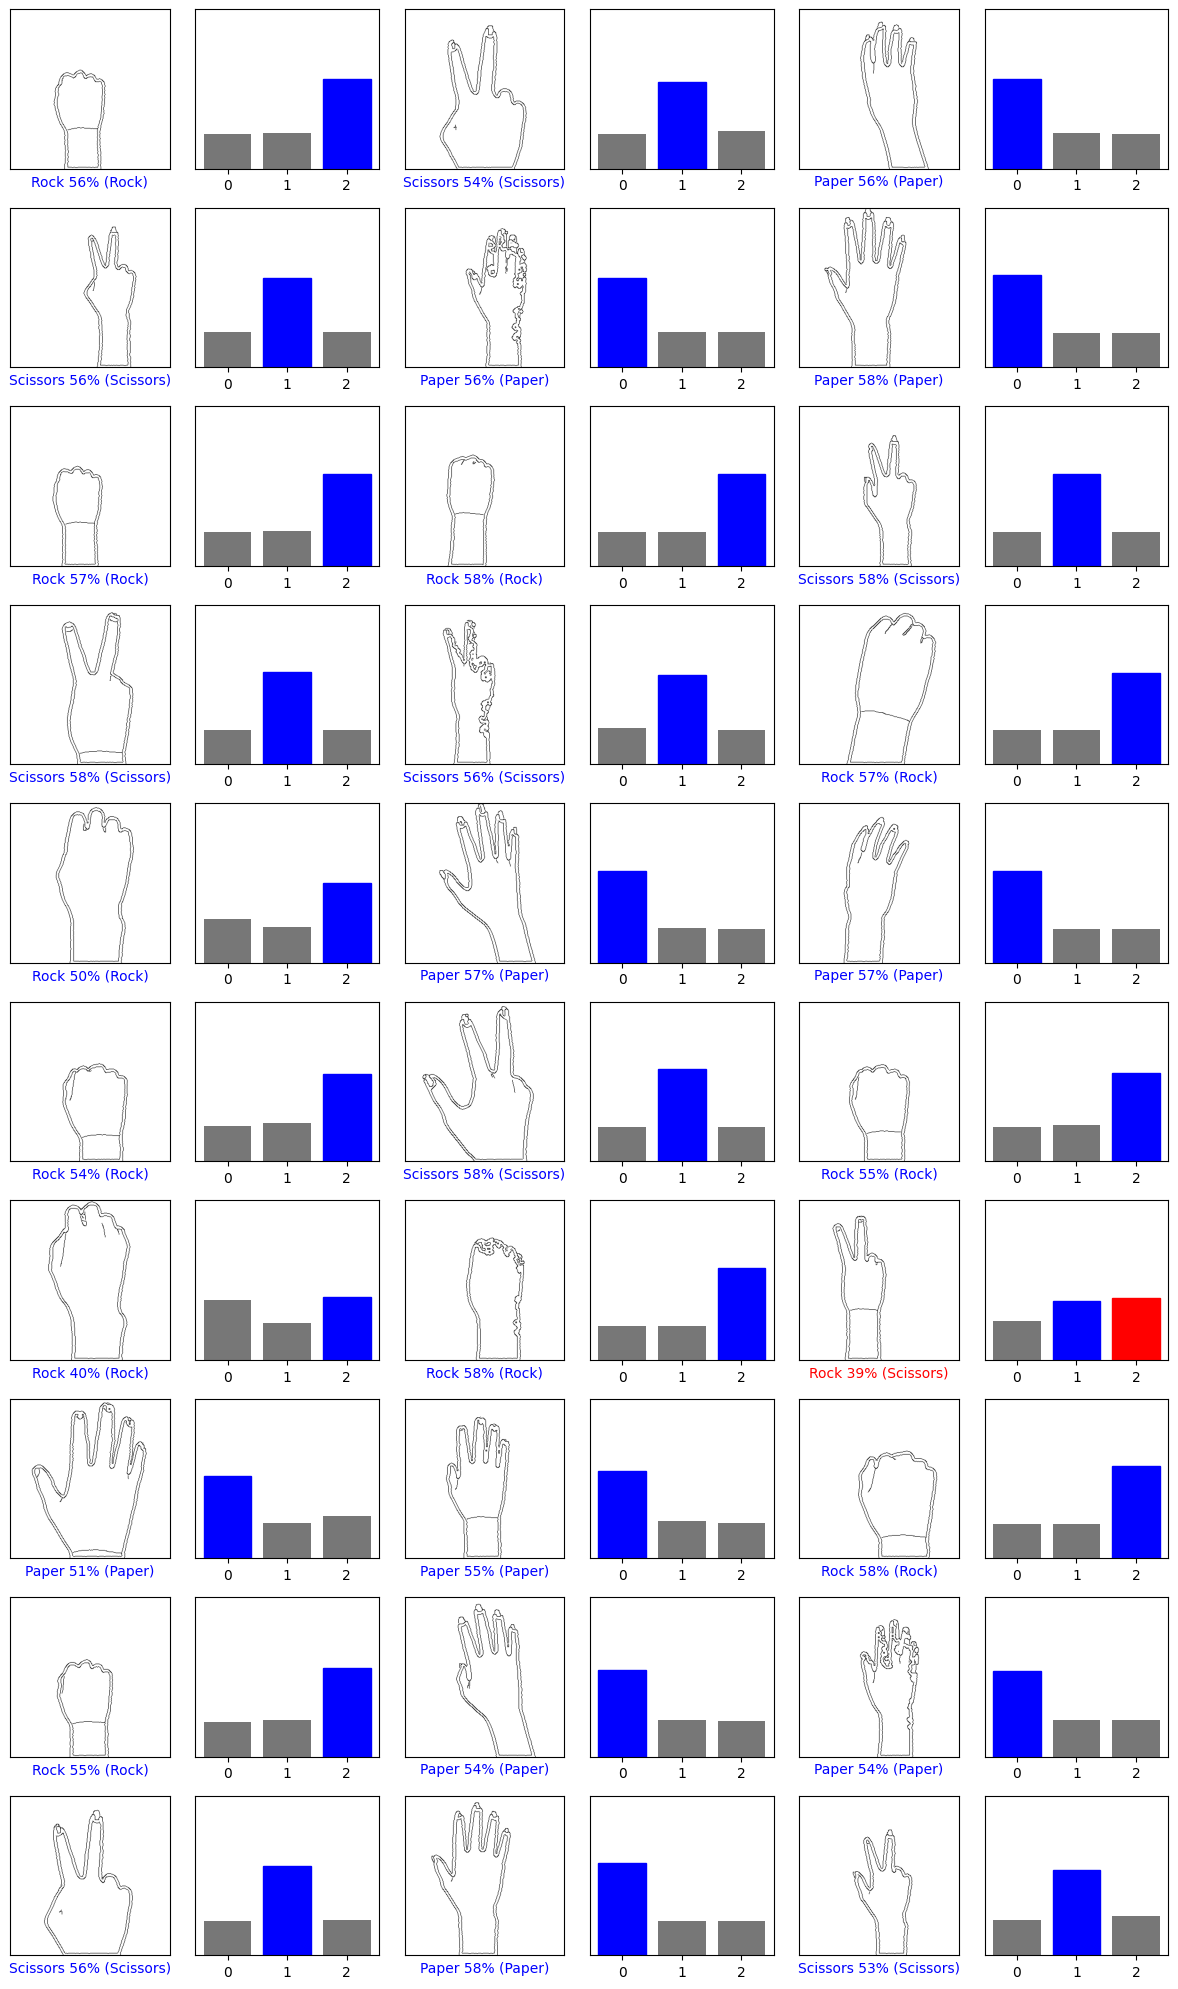

In [ ]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, softmax_output[i], test_labels_array_shuffled, test_images_array_shuffled)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, softmax_output[i], test_labels_array_shuffled)
plt.tight_layout()
plt.show()